## Import libraries

In [1]:
# Importing the libraries

import numpy as np
print('Numpy version: ', np.__version__)

import matplotlib.pyplot as plt

import mne
print('MNE-Python: ', mne.__version__)

mne.set_log_level('error')  # reduce extraneous MNE output

Numpy version:  1.24.3
MNE-Python:  1.4.2


## Importing preprocessed data

In [2]:
filters = list()
file_path = "D:\IIIT_Hyderabad\Code\preprocessed_data\sub-"
suffix = "_ses-t1_task-resteyesc_eeg_ica_filtered.fif"
for i in range(111):
    j = str(i+1)
    file_name = file_path+j+suffix
    filtered = mne.io.read_raw_fif(file_name)
    # Set montage
    montage = 'standard_1005'  # Electrode position file
    filtered.set_montage(montage)
    filters.append(filtered)

In [3]:
len(filters)

111

C:\Users\Divya Tiwari\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


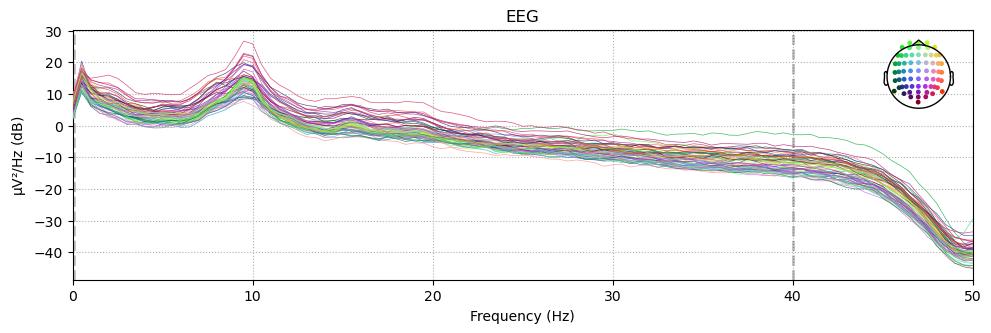

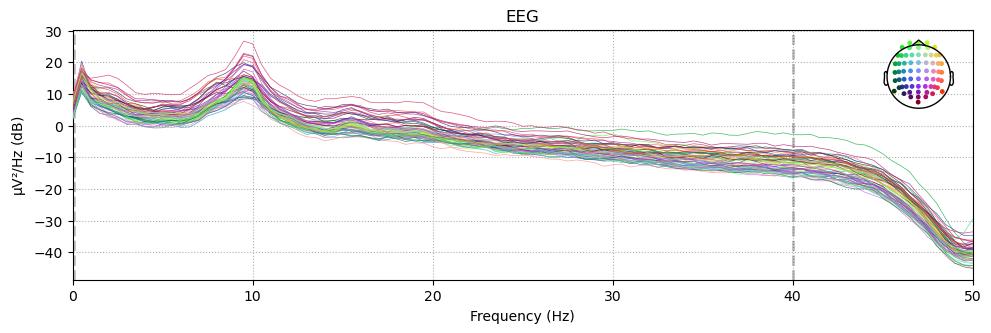

In [4]:
filtered = filters[82]
filtered.plot_psd(fmax = 50)

In [7]:
epochs = []
for i in range(111):
    raw = filters[i]
    tstep = 2.0
    event = mne.make_fixed_length_events(raw, duration=tstep)
    epoch = mne.Epochs(raw, event, tmin=0.0, tmax=tstep, baseline=(0,0.5), preload=True)
    epochs.append(epoch)
    j = str(i+1)
    epoch.save("D:\IIIT_Hyderabad\Code\preprocessed_epochs\sub-"+j+"_ses-t1_task-resteyesc_eeg_ica_filtered.fif", overwrite='True')

In [8]:
sample = epochs[i]
data = sample.get_data()
data.shape

(119, 64, 2049)

In [9]:
nill = np.zeros((119,64,2049))
nill[0,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
for i in range(111):
    data_file = epochs[i]
    data = data_file.get_data()
    nill = np.add(nill,data)
nill[0,0:5,0:5]

array([[1.15378007e-04, 1.13003534e-04, 1.10922145e-04, 1.09405413e-04,
        1.08683236e-04],
       [7.37532901e-05, 7.19649875e-05, 7.02263693e-05, 6.85926359e-05,
        6.71073035e-05],
       [7.06588546e-05, 6.63856743e-05, 6.23642988e-05, 5.88353482e-05,
        5.60158278e-05],
       [1.52818103e-04, 1.61459208e-04, 1.70008647e-04, 1.78378123e-04,
        1.86486313e-04],
       [1.20065319e-04, 1.31251370e-04, 1.42308853e-04, 1.53114790e-04,
        1.63553253e-04]])

In [11]:
nill = nill/len(epochs)
nill[0,0:5,0:5]

array([[1.03944151e-06, 1.01804985e-06, 9.99298602e-07, 9.85634355e-07,
        9.79128250e-07],
       [6.64444055e-07, 6.48333221e-07, 6.32669993e-07, 6.17951675e-07,
        6.04570301e-07],
       [6.36566258e-07, 5.98069138e-07, 5.61840530e-07, 5.30048182e-07,
        5.04647097e-07],
       [1.37673967e-06, 1.45458746e-06, 1.53160944e-06, 1.60701012e-06,
        1.68005687e-06],
       [1.08166954e-06, 1.18244478e-06, 1.28206174e-06, 1.37941252e-06,
        1.47345273e-06]])

In [12]:
epoch = epochs[42]
info = epoch.info

In [13]:
final_epoch = mne.EpochsArray(nill, info)

In [14]:
final_epoch.plot()

C:\Users\Divya Tiwari\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


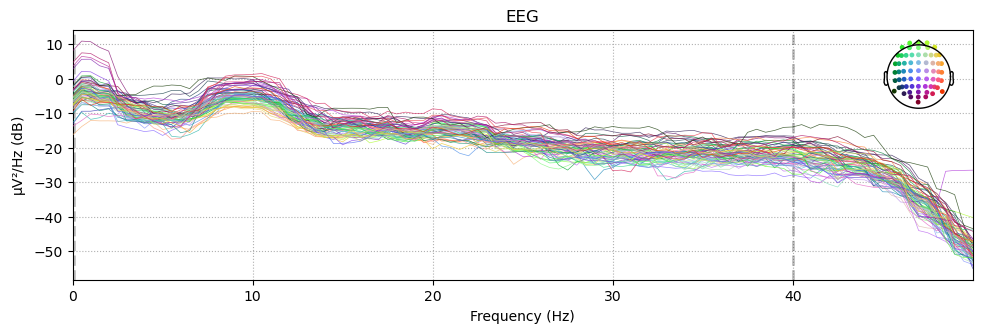

In [15]:
final_epoch.average().plot_psd(fmax = 50)

In [16]:
final_epoch.save("D:\IIIT_Hyderabad\Code\last_files\opensource_epoch_data.fif", overwrite = True)

## Original

In [5]:
data = np.zeros((64,245760))
data.shape

(64, 245760)

In [7]:
raw = filters[42].get_data()
raw[0,:]

array([-1.69761325e-08,  2.38931847e-07,  5.36147184e-07, ...,
        1.68561269e-06,  8.42575105e-07, -1.69761325e-08])

In [6]:
for i in range(111):
    data_file = filters[i]
    data1 = data_file.get_data()
    data = np.add(data,data1)

In [8]:
data[0,:]

array([-3.79942090e-07, -2.75441604e-06, -4.83580470e-06, ...,
       -5.79976419e-06, -3.03755481e-06, -3.79942090e-07])

In [8]:
# Averaging out the data
data = data/len(filters)

In [9]:
data[0,:]

array([-3.79942090e-07, -2.75441604e-06, -4.83580470e-06, ...,
       -5.79976419e-06, -3.03755481e-06, -3.79942090e-07])

C:\Users\Divya Tiwari\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


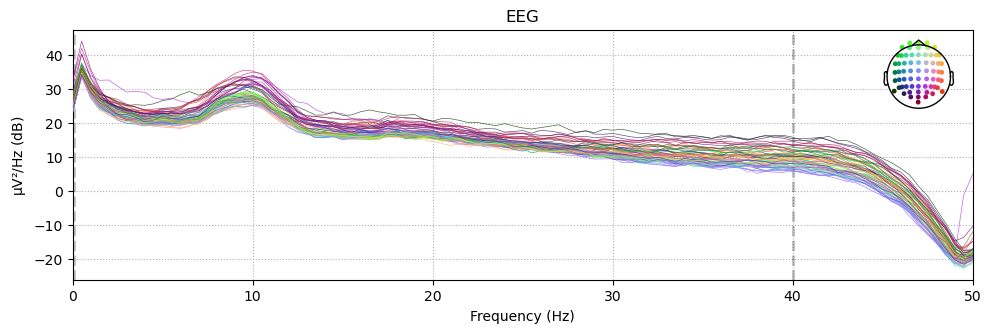

In [10]:
info = filters[42].info

averaged_file = mne.io.RawArray(data,info)

averaged_file.plot()
averaged_file.plot_psd(fmax = 50)

In [11]:
averaged_file.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 40.0 Hz
 meas_date: 2021-08-24 11:04:08 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 1024.0 Hz
>

In [12]:
averaged_file.save("D:\IIIT_Hyderabad\Code\last_files\opensource_data.fif", overwrite = True)

In [13]:
# Applying band pass filter
filtered_file = averaged_file.copy().filter(l_freq = 1, h_freq = None)
filtered_file.save("D:\IIIT_Hyderabad\Code\last_files\opensource_exp_data.fif", overwrite = True)

C:\Users\Divya Tiwari\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


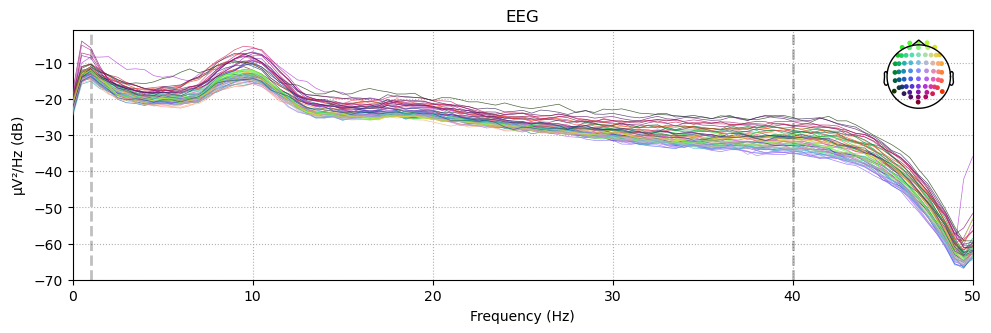

In [14]:
filtered_file.plot_psd(fmax = 50)